In [ ]:
#Sentiment analysis

In [2]:
!pip install tweepy
!pip install textblob
!pip install WordCloud
!pip install pandas
!pip install numpy
!pip install re
!pip install matplotlib
!pip install pipreqs


ERROR: Could not find a version that satisfies the requirement re (from versions: none)
ERROR: No matching distribution found for re


In [1]:
 import tweepy
 from textblob import TextBlob
 from wordcloud import WordCloud
 import pandas as pd
 import numpy as np
 import re
 import  matplotlib.pyplot as plt
 plt.style.use('fivethirtyeight')


In [9]:
#load the data
from google.colab import files
uploaded = files.upload()


Saving tweetcreds.csv to tweetcreds.csv


In [10]:
#get the data
log = pd.read_csv('tweetcreds.csv')

In [11]:
#Twitter API Credentials
consumerKey=log['key'][0]
consumerSecret=log['key'][1]
accessToken=log['key'][2]
accessTokenSecret = log['key'][3]

In [12]:
#create authentication object
authenticate = tweepy.OAuthHandler(consumerKey,consumerSecret)

#set the access token and access token secret
authenticate.set_access_token(accessToken, accessTokenSecret)

#create the API onject
api = tweepy.API(authenticate,wait_on_rate_limit=True)

In [26]:
username=input("enter the username")

enter the usernamejayeshjainsays


In [27]:
# Extract 100 tweets from twitter user
posts = api.user_timeline(screen_name = username, count=500,lang='en',tweet_mode="extended")

#print last 5 tweets
for tweet in posts[0:5]:
  print(tweet.full_text + '\n')

Why @Microsoft Execl sucks on office laptops 🙅

Lockdown lagg gaya Mumbai mein
#mumbailockdown

@PreminemLfc @Atheist_Krishna Its on my list to watch

Rains came out of syllabus 
#MumbaiRains

@Atheist_Krishna Drishyam
Drishyam 2
Sarpatta Parambarai
Minnal Murali
Jai Bhim



In [28]:
df=pd.DataFrame([tweet.full_text for tweet in posts ],columns=['Tweets'])
df.head()

,Tweets
0,Why @Microsoft Execl sucks on office laptops 🙅
1,Lockdown lagg gaya Mumbai mein\n#mumbailockdown
2,@PreminemLfc @Atheist_Krishna Its on my list t...
3,Rains came out of syllabus \n#MumbaiRains
4,@Atheist_Krishna Drishyam\nDrishyam 2\nSarpatt...


In [29]:
#clean the text

#create a function to clean tweets
def cleanTxt(text):
  #text=re.sub(r'@[A-Za-z0-9]+','',text) # remove @ mentions
  text=re.sub(r"(?:\@|http?\://|https?\://|www)\S+", '', text)
  text=" ".join(text.split())
  text=re.sub(r'#','',text) #remove hashtags
  text = re.sub(r'RT[\s]+','',text) #remove RT

  #text=re.sub(r'https?:\/\/\S+','',text) #remove the hyper link
  emoji_pattern = re.compile("["u"\U0001F600-\U0001F64F" "]+", flags = re.UNICODE) #remove emojis
  text=emoji_pattern.sub(r'', text)

  return text

df['Tweets']=df['Tweets'].apply(cleanTxt)

#show 
df

,Tweets
0,Why Execl sucks on office laptops
1,Lockdown lagg gaya Mumbai mein mumbailockdown
2,Its on my list to watch
3,Rains came out of syllabus MumbaiRains
4,Drishyam Drishyam 2 Sarpatta Parambarai Minnal...
...,...
194,"Yesterday's IPL match : A night of casual ""Bod..."
195,Ek min KaranJohar career banata he Yaa dubaa d...
196,Lock Unlock Lock Repeat way of handling the pa...
197,Still would end up missing semi colons.


In [30]:
#function to get subjectivity ( opinons )

def getSubjectivity(text):
  return TextBlob(text).sentiment.subjectivity

#function to get Polarity
def getPolarity(text):
  return TextBlob(text).sentiment.polarity

#create new columns
df['subjectivity']=df['Tweets'].apply(getSubjectivity)
df['Polarity']=df['Tweets'].apply(getPolarity)

#show new df with new columns
df

,Tweets,subjectivity,Polarity
0,Why Execl sucks on office laptops,0.300000,-0.300
1,Lockdown lagg gaya Mumbai mein mumbailockdown,0.000000,0.000
2,Its on my list to watch,0.000000,0.000
3,Rains came out of syllabus MumbaiRains,0.000000,0.000
4,Drishyam Drishyam 2 Sarpatta Parambarai Minnal...,0.000000,0.000
...,...,...,...
194,"Yesterday's IPL match : A night of casual ""Bod...",0.633333,-0.275
195,Ek min KaranJohar career banata he Yaa dubaa d...,0.000000,0.000
196,Lock Unlock Lock Repeat way of handling the pa...,0.000000,0.000
197,Still would end up missing semi colons.,0.050000,-0.200


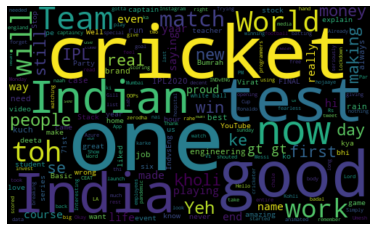

In [31]:
from pandas.core.common import random_state
#word cloud
allWords=''.join([twts for twts in df['Tweets']])
wordCloud = WordCloud(width=500,height=300,random_state=21,max_font_size=120).generate(allWords)

plt.imshow(wordCloud,interpolation="bilinear")
plt.axis('off')
plt.show()


In [32]:
#create a function to compute the -ve,+ve and neutral analysis

def getAnalysis(score):
  if score <0:
    return 'Negative'
  elif score==0:
    return 'Neutral'
  else:
    return 'Positive'

df['Analysis']=df['Polarity'].apply(getAnalysis)

df


,Tweets,subjectivity,Polarity,Analysis
0,Why Execl sucks on office laptops,0.300000,-0.300,Negative
1,Lockdown lagg gaya Mumbai mein mumbailockdown,0.000000,0.000,Neutral
2,Its on my list to watch,0.000000,0.000,Neutral
3,Rains came out of syllabus MumbaiRains,0.000000,0.000,Neutral
4,Drishyam Drishyam 2 Sarpatta Parambarai Minnal...,0.000000,0.000,Neutral
...,...,...,...,...
194,"Yesterday's IPL match : A night of casual ""Bod...",0.633333,-0.275,Negative
195,Ek min KaranJohar career banata he Yaa dubaa d...,0.000000,0.000,Neutral
196,Lock Unlock Lock Repeat way of handling the pa...,0.000000,0.000,Neutral
197,Still would end up missing semi colons.,0.050000,-0.200,Negative


In [33]:
#print all of positive tweets
j=1
sortedDF=df.sort_values(by=['Polarity'])
for i in range(0,sortedDF.shape[0]):
  if (sortedDF['Analysis'][i]=='Positive'):
    print(str(j)+') '+sortedDF['Tweets'][i])
    print()
    j=j+1

1) Rishab can be all fearless he wants in white ball cricket But tests naah Especially in such do or die situations INDvsSA

2) such an amazing all rounder Simply Amazing INDvsSA

3) My only resolution for the year 2022 is to be more organized.

4) Okay 👍

5) Good morning my name is Virat Kohli and I recommend playing the ball on 11th stump for sheer outside edge and long last…

6) Being just a good captain is not enough Not even a decent perfomance ViratKohli IndvsSaf

7) good for showbaazi

8) 📚:The psychology of money How to invest your money in your 20s Instagram page to follow : Do a zerodha beginners course "Stock Market Basics" ( free certification ) App Name : Zerodha Varsity For personal finances : explore 50/30/20 rule

9) My favorite phrase in Indian English, out of many, is ‘enthu cutlet’. Someone who is overly enthusiastic is somehow, also,…

10) The year 2022 is starting with a sunday Already excited 

11) They flipped a coin the one who wins get the captaincy And we know

In [34]:
#print all of negative tweets
j=1
sortedDF=df.sort_values(by=['Polarity'],ascending='False')
for i in range(0,sortedDF.shape[0]):
  if (sortedDF['Analysis'][i]=='Negative'):
    print(str(j)+') '+sortedDF['Tweets'][i])
    print()
    j=j+1

1) Why Execl sucks on office laptops 

2) When is 83 movie releasing? Desperately want to watch India winning the World Cup.

3) Twitter ApI and Tweepy are a deadly combo 💯 TwitterForDevelopers

4) Areey yaar abhi public bol rahi he Weak Team ke saamne score karke kya milega IndianCricketTeam

5) Lage sath microsoft teams bhi down hojaaye toh ...

6) Alexa, play Bumrah Alexa: Sorry, Bumrah is unplayable

7) Interviewer: Can you explain the gap in your CV? Me: I spent 6 hours formatting it in Google Docs and you've opened it in…

8) You mean a marathon right?

9) I like how Indian Team took NOT WORKING ON Sunday so seriously INDvENG

10) Haan Yaar wrong way pe hi chale gaye

11) My school math teacher was wrong about probability I mean look at IndvsEng TossLoss

12) Facts can't be proven wrong.

13) The worst brand ever 2 months have passed still no response from them Stop calling your brand "made in india" simply downgrading india image

14) worldtestchampionshipfinal Its Bad light vs 

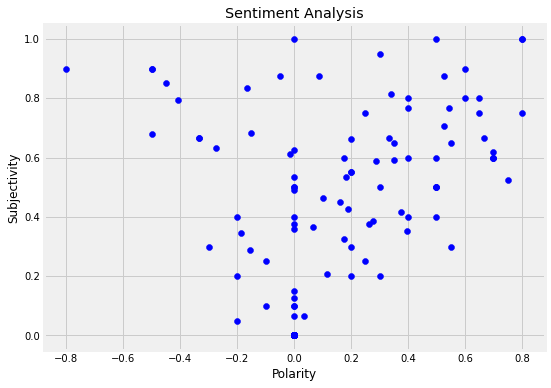

In [35]:
#plot polarity and subjectivity

plt.figure(figsize=(8,6))
for i in range(0,df.shape[0]):
  plt.scatter(df['Polarity'][i],df['subjectivity'][i],color='Blue')

plt.title('Sentiment Analysis')
plt.xlabel('Polarity')
plt.ylabel('Subjectivity')
plt.show()


In [36]:
#get percentage of positive tweets
ptweets=df[df.Analysis == 'Positive']
ptweets=ptweets['Tweets']

round((ptweets.shape[0]/ df.shape[0])*100,1)

28.6

In [37]:
#get percentage of negative tweets
ntweets=df[df.Analysis == 'Negative']
ntweets=ntweets['Tweets']

round((ntweets.shape[0]/ df.shape[0])*100,1)

10.6

In [38]:
#get percentage of neutral tweets
nntweets=df[df.Analysis == 'Neutral']
nntweets=nntweets['Tweets']

round((nntweets.shape[0]/ df.shape[0])*100,1)

60.8

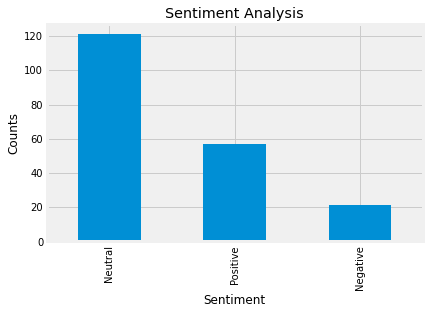

In [39]:
#show the value counts

df['Analysis'].value_counts()

#plot an viz
plt.title('Sentiment Analysis')
plt.xlabel('Sentiment')
plt.ylabel('Counts')


df['Analysis'].value_counts().plot(kind='bar')
plt.show()
